In [42]:
import os
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import rc as rc
from netCDF4 import Dataset
from scipy.optimize import curve_fit

In [43]:
#
# load flux data
#
class flux_data(object):

    def __init__(self, filename):
        # read flux data
        self.read_flux_data(filename)
    def read_flux_data(self,filename):
        # threshold depth
        minimum_sampling_depth, maximum_depth = 100, 500 # (m)
        # array initialization
        profile_name, depth, dates, total_flux = [], [], [], []
        
        # load data
        ncid = Dataset(filename, "r", format="NETCDF4")
        for gp in ncid.groups:
            ngp = ncid.groups[gp]
            # load representative profile data (discard dataset that are too shallow)
            dpt = ngp['depth'][:]
            dpt, inddepth = dpt[np.where(dpt<=maximum_depth)[0]], np.where(dpt<=maximum_depth)[0] # depth limiter for the computation of remineralization

            # store data
            if np.max(dpt)>minimum_sampling_depth:
                profile_name.append(gp), dates.append(ngp['ordinal_dates'][:])
                depth.append(dpt), total_flux.append(ngp['total_carbon_flux'][inddepth])

        ncid.close()
        #
        self.profile_name, self.dates = profile_name, dates
        self.depth, self.total_flux = depth, total_flux
            

# read carbon flux related data (dates, depth, flux and profile name)
if 'loziel' in os.getcwd():
    path_data ='/Users/leo/Documents/MOSAIC_UVP/data/' ##### to be changed by Lo
elif 'fbirrien' in os.getcwd():
    path_data = '/home/fbirrien/NuArctic/nuarctic/UVP/data/'

filename = path_data + 'mosaic_flux_slope.nc'
data = flux_data(filename)

In [44]:
# curve to fit
def MartinCurve(z,b):
    return (z/100)**(-b)

def MartinCurve_2_unknown(z,a,b):
    return a * (z/100)**(-b)

In [45]:
# plot properties
date_ref_plot=datetime.strptime('01/01/1970', '%d/%m/%Y').toordinal()
lbsz, tcsz, mksz = 30, 25,18
rc('xtick', labelsize=tcsz-8) , rc('ytick', labelsize=tcsz)
fgsz=(12,8)
dl=[0,500]

In [46]:
# Arguments to compute remineralization
# set reference and limit depth
reference_depth, limit_depth_maximum = 50, 100 # reference depth is here 50m (waiting for PAR data)

# set criteria in maximum dectection
choice_of_maximum = 0 #(0: global maximum (0-100m), 1:weighted maximum)

#choose whether to impose a range for the parameters to be fitted 
flag_bound=False

[[ 0.01493755 -0.00284591]
 [-0.00284591  0.0076865 ]]
sigma: [0.11764588] [0.12221929 0.08767268]


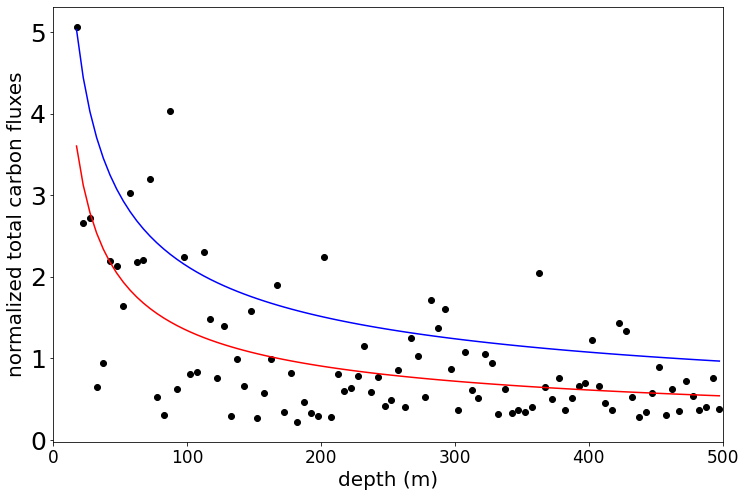

[[ 0.02713439 -0.02359183]
 [-0.02359183  0.04469243]]
sigma: [0.19740515] [0.16472521 0.21140584]
[[ 0.00034694 -0.00253038]
 [-0.00253038  0.01849268]]
sigma: [0.02217327] [0.01862629 0.13598781]
[[ 0.03688091 -0.03159723]
 [-0.03159723  0.04012454]]
sigma: [0.2320147] [0.19204403 0.20031111]


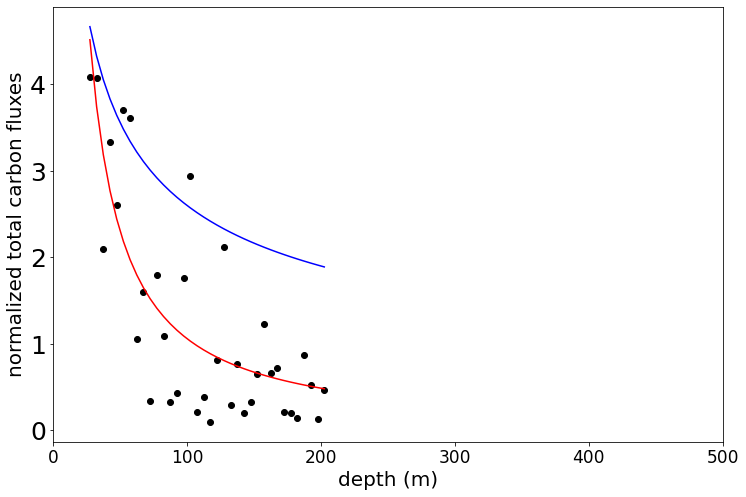

[[ 0.02794114 -0.02603991]
 [-0.02603991  0.04906665]]
sigma: [0.19700711] [0.16715603 0.22150994]
[[ 0.02522959 -0.01665932]
 [-0.01665932  0.03017026]]
sigma: [0.1981401] [0.15883825 0.17369588]
[[ 0.01855449 -0.01029876]
 [-0.01029876  0.01257977]]
sigma: [0.11818584] [0.13621487 0.11215958]


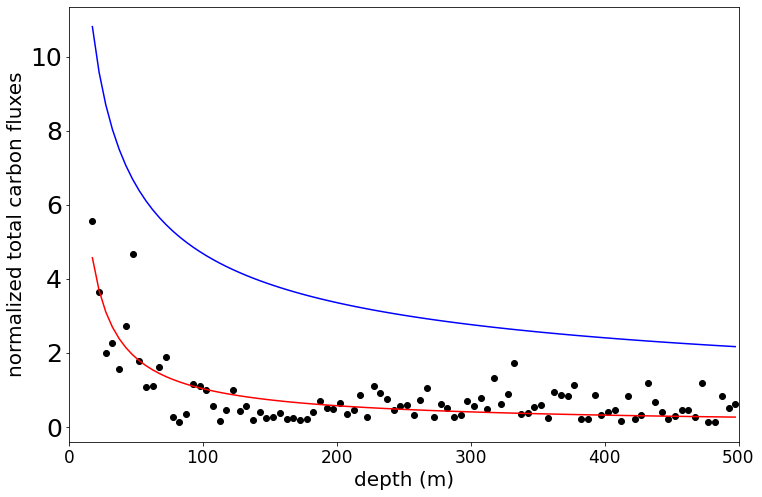

[[ 0.01676047 -0.00569226]
 [-0.00569226  0.01345355]]
sigma: [0.13414939] [0.12946223 0.11598943]
[[ 0.02122371 -0.01170462]
 [-0.01170462  0.01238949]]
sigma: [0.13308753] [0.1456836  0.11130807]
[[ 0.02021488 -0.01047358]
 [-0.01047358  0.00922051]]
sigma: [0.11545839] [0.14217906 0.09602351]


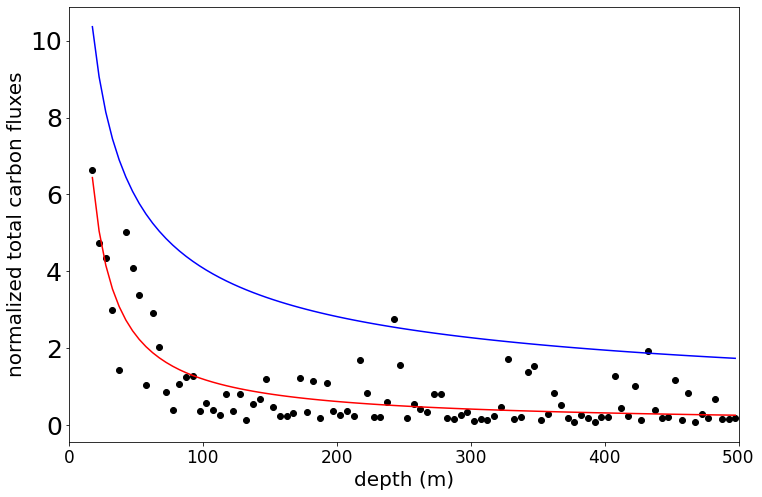

[[ 0.03050074 -0.10178807]
 [-0.10178807  0.35404559]]
sigma: [2.00983376] [0.1746446 0.5950173]
[[ 0.07869268 -0.13858739]
 [-0.13858739  0.27068223]]
sigma: [0.28194697] [0.28052215 0.52027131]
[[ 0.04097708 -0.05290679]
 [-0.05290679  0.08754901]]
sigma: [0.22663189] [0.20242796 0.29588682]


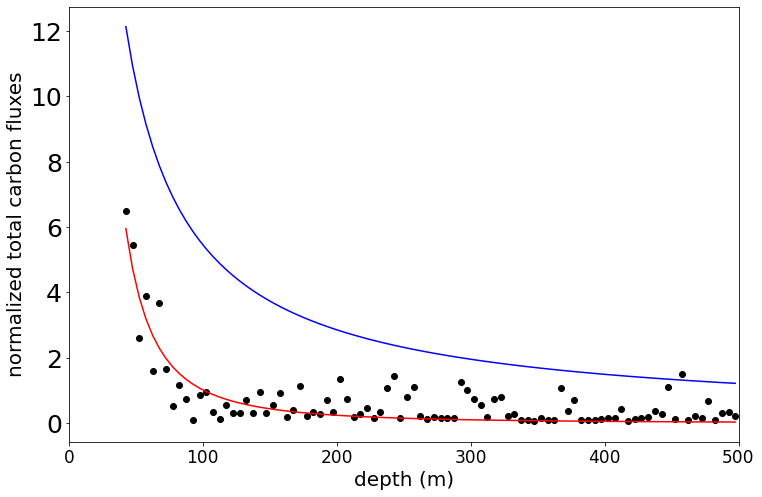

[[ 0.02872001 -0.01952084]
 [-0.01952084  0.02749047]]
sigma: [0.21881906] [0.16946981 0.16580249]
[[ 0.02187974 -0.01467052]
 [-0.01467052  0.02265295]]
sigma: [0.15161884] [0.14791801 0.15050896]
[[ 0.03573938 -0.03885745]
 [-0.03885745  0.05493633]]
sigma: [0.22297264] [0.18904862 0.234385  ]


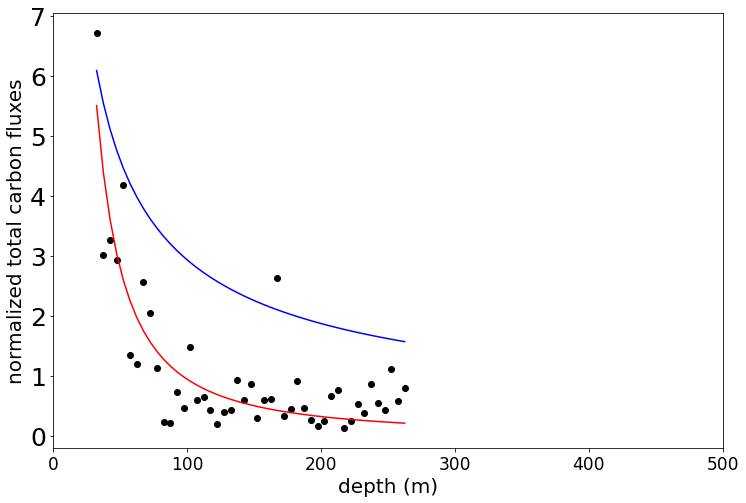

[[ 0.01073396 -0.00435587]
 [-0.00435587  0.0018427 ]]
sigma: [0.01687115] [0.10360482 0.04292664]
[[ 0.02668146 -0.01807452]
 [-0.01807452  0.01853591]]
sigma: [0.1597189] [0.1633446  0.13614665]
[[ 0.03331619 -0.16228819]
 [-0.16228819  0.83155868]]
sigma: [0.25936129] [0.18252724 0.91189839]


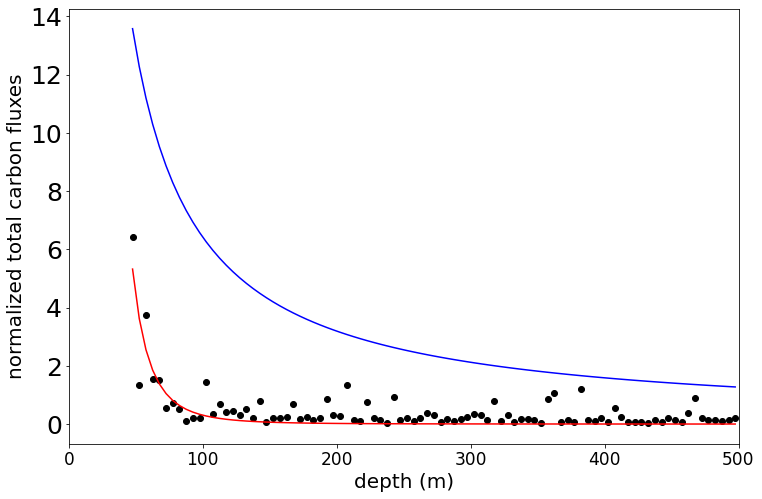

[[ 0.04763828 -0.01702392]
 [-0.01702392  0.00705561]]
sigma: [0.4209757] [0.21826195 0.08399765]
[[ 0.02419162 -0.01756835]
 [-0.01756835  0.02247422]]
sigma: [0.14569748] [0.15553657 0.14991403]
[[ 0.01353403 -0.00452089]
 [-0.00452089  0.00162189]]
sigma: [0.03241726] [0.11633584 0.04027273]


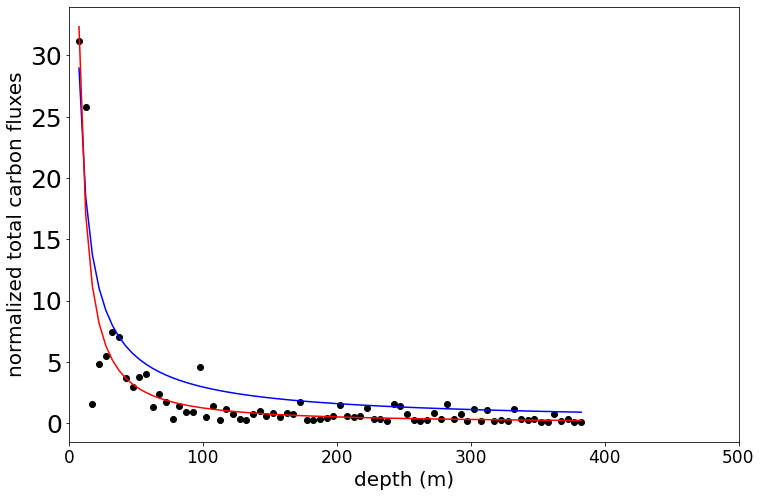

[[ 0.00647497 -0.00389457]
 [-0.00389457  0.00240436]]
sigma: [0.02855855] [0.08046717 0.04903429]
[[ 0.03126374 -0.02228553]
 [-0.02228553  0.02155715]]
sigma: [0.1714571] [0.17681556 0.14682353]
[[ 0.03850372 -0.02683714]
 [-0.02683714  0.02200137]]
sigma: [0.23881836] [0.19622366 0.1483286 ]


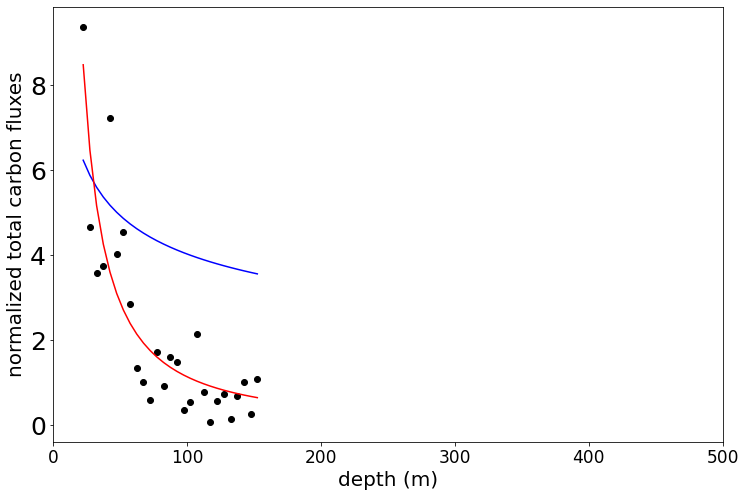

[[ 0.03341541 -0.04327009]
 [-0.04327009  0.0638426 ]]
sigma: [0.20219098] [0.18279883 0.25267094]
[[ 0.04122567 -0.04507263]
 [-0.04507263  0.05898665]]
sigma: [0.32209517] [0.20304106 0.24287168]
[[ 0.03395207 -0.06545145]
 [-0.06545145  0.13951171]]
sigma: [0.25566848] [0.18426087 0.37351267]


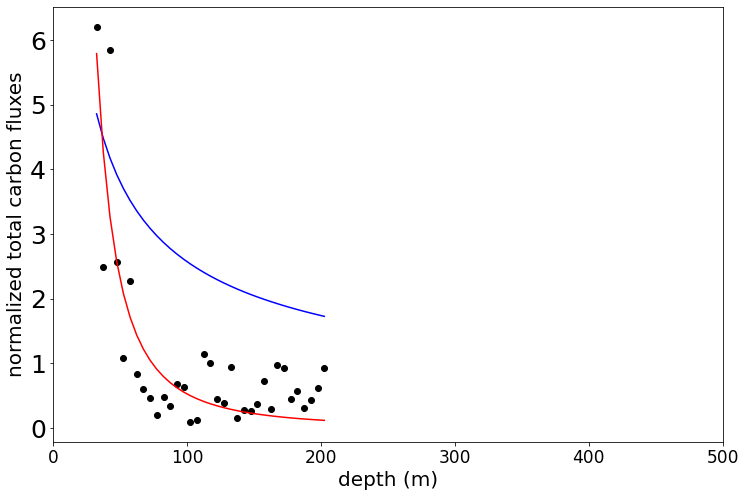

[[ 0.02903449 -0.1196578 ]
 [-0.1196578   0.51881707]]
sigma: [0.22625757] [0.17039509 0.72028958]
[[ 0.03824619 -0.04860331]
 [-0.04860331  0.07821515]]
sigma: [0.22667289] [0.19556633 0.27966971]
[[ 0.02609424 -0.02636382]
 [-0.02636382  0.04958054]]
sigma: [0.17244264] [0.16153712 0.22266688]


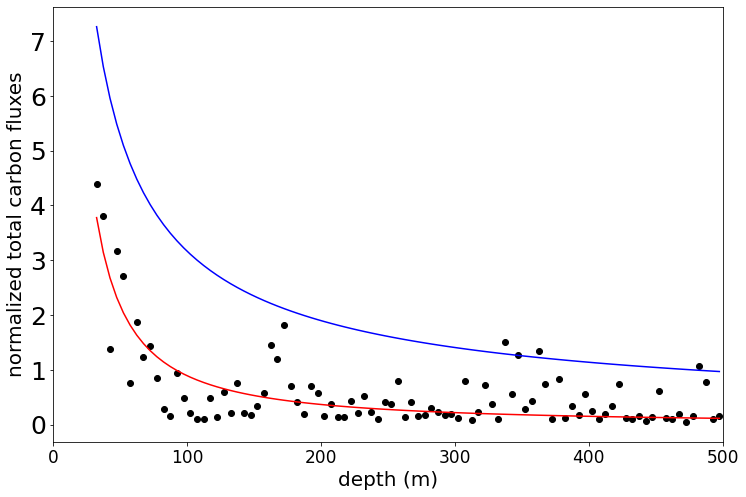

[[ 0.01857315 -0.00637031]
 [-0.00637031  0.00396627]]
sigma: [0.07627744] [0.13628335 0.06297833]
[[0.02791926 0.00072691]
 [0.00072691 0.08313789]]
sigma: [0.29539307] [0.16709058 0.28833641]
[[ 9.25683428e-06 -5.38411809e-04]
 [-5.38411809e-04  3.13253762e-02]]
sigma: [0.01180738] [0.0030425  0.17698976]


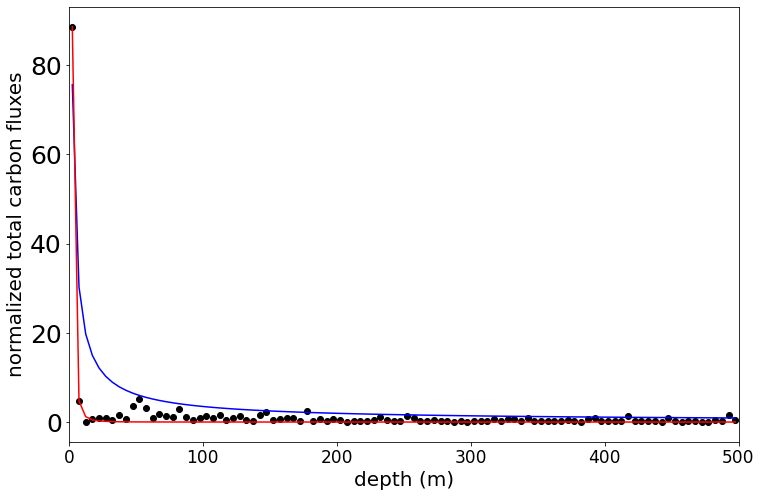

[[ 0.03068097 -0.04238434]
 [-0.04238434  0.09177489]]
sigma: [0.19967379] [0.17515983 0.30294371]
[[ 0.00989424 -0.01422564]
 [-0.01422564  0.02124658]]
sigma: [0.01866373] [0.09946981 0.14576207]
[[ 0.01164294 -0.16700497]
 [-0.16700497  2.43797727]]
sigma: [0.42297273] [0.10790246 1.56140234]


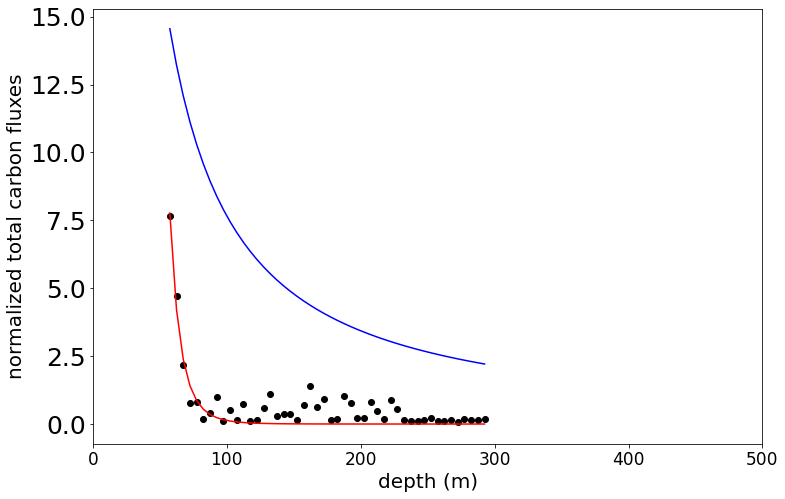

[[ 0.03194563 -0.00621184]
 [-0.00621184  0.14044571]]
sigma: [0.35113547] [0.17873341 0.37476087]
[[ 0.02030352 -0.27471034]
 [-0.27471034  3.78747584]]
sigma: [0.54693081] [0.14249043 1.94614384]
[[ 0.01749332 -0.00907443]
 [-0.00907443  0.00694325]]
sigma: [0.08803355] [0.1322623 0.0833262]


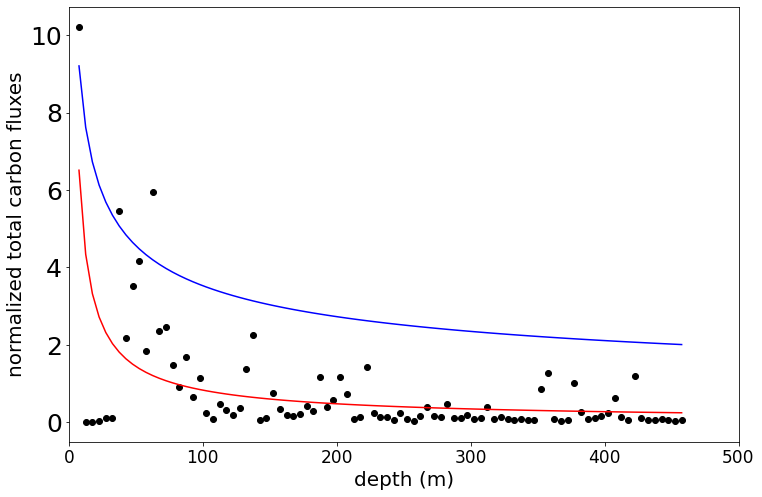

[[ 0.04451837 -0.02429854]
 [-0.02429854  0.27791005]]
sigma: [0.54127638] [0.21099377 0.52717175]
[[ 0.06144886 -0.10361626]
 [-0.10361626  0.37029673]]
sigma: [0.54290199] [0.24788881 0.60852011]
[[ 0.04394372 -0.01008504]
 [-0.01008504  0.14516312]]
sigma: [0.55241657] [0.20962756 0.38100279]


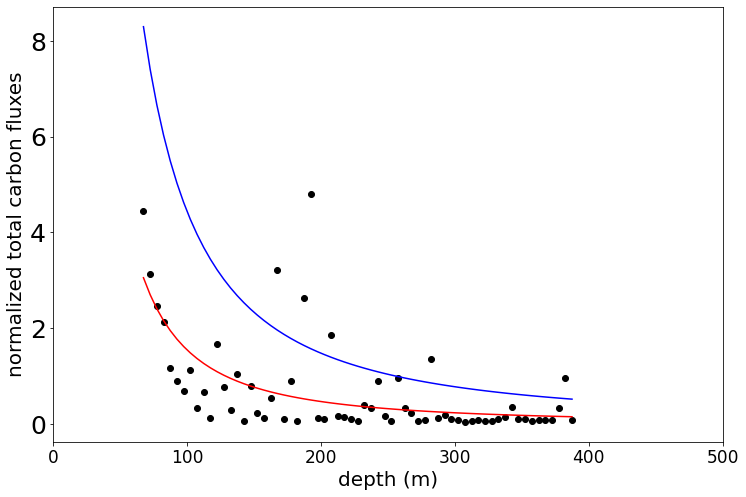

[[0.02985262 0.03106002]
 [0.03106002 0.07767654]]
sigma: [0.1998225] [0.17277911 0.27870511]
[[ 0.03734152 -0.00617538]
 [-0.00617538  0.03425209]]
sigma: [0.43209926] [0.19323955 0.18507321]
[[ 0.01914036 -0.00651971]
 [-0.00651971  0.00349772]]
sigma: [0.07761316] [0.13834868 0.05914151]


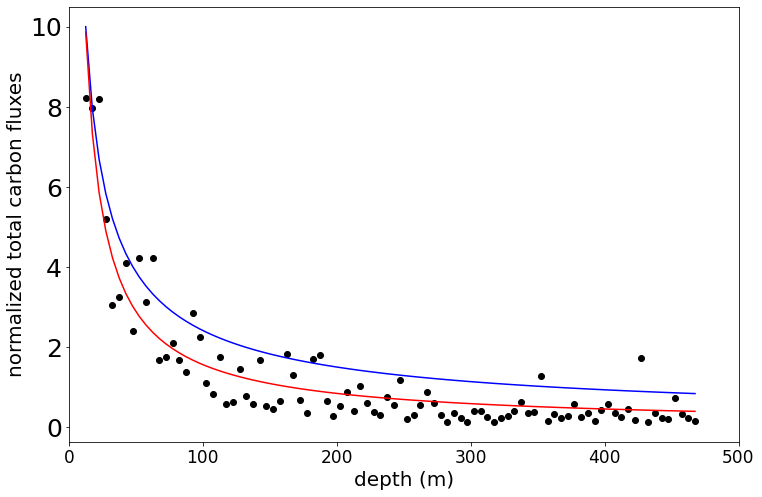

[[ 0.01795752 -0.00625722]
 [-0.00625722  0.00394268]]
sigma: [0.09077784] [0.13400568 0.0627908 ]
[[ 0.02257471 -0.01032994]
 [-0.01032994  0.00990453]]
sigma: [0.15040945] [0.15024882 0.09952149]
[[ 0.02037955 -0.0066141 ]
 [-0.0066141   0.00357124]]
sigma: [0.11189899] [0.14275697 0.05975981]


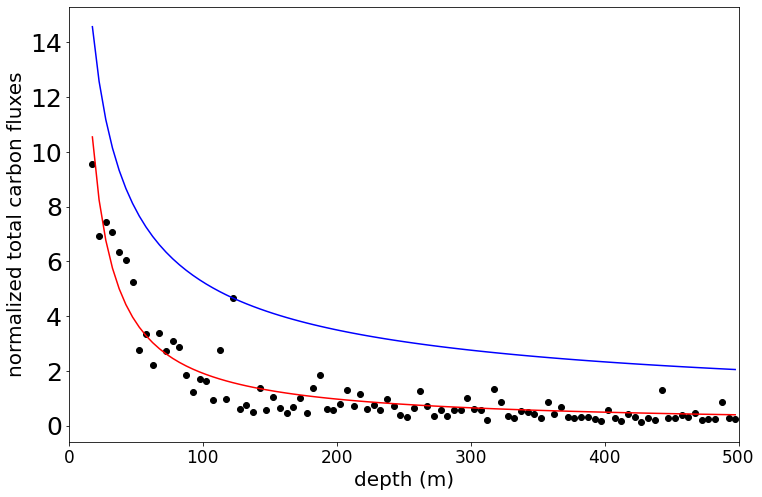

[[ 0.0256765  -0.00584683]
 [-0.00584683  0.00157385]]
sigma: [0.11924952] [0.1602389  0.03967179]
[[ 0.03019079 -0.0085819 ]
 [-0.0085819   0.00812142]]
sigma: [0.26881545] [0.17375498 0.09011894]
[[ 0.0192812  -0.00440647]
 [-0.00440647  0.00146136]]
sigma: [0.08869524] [0.13885675 0.03822767]


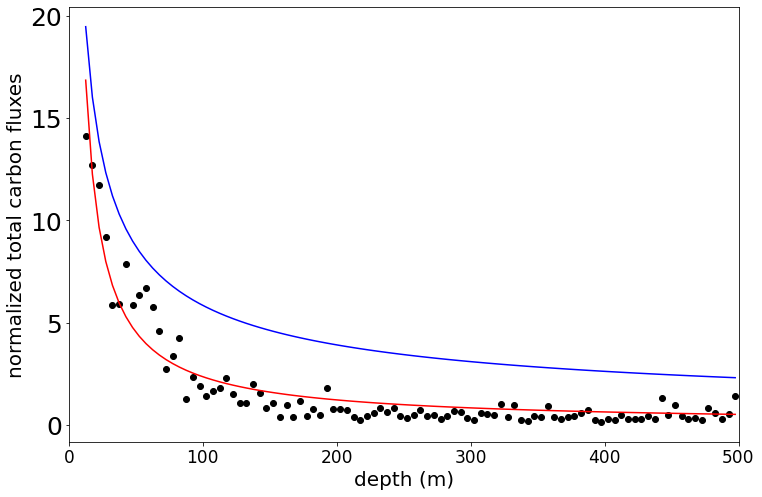

[[ 0.02891473 -0.00932504]
 [-0.00932504  0.0037251 ]]
sigma: [0.14560963] [0.17004333 0.06103361]
[[ 0.02790781 -0.00827654]
 [-0.00827654  0.00328215]]
sigma: [0.14924956] [0.16705632 0.05729005]
[[ 0.02258633 -0.00372714]
 [-0.00372714  0.00077993]]
sigma: [0.10960734] [0.15028749 0.02792726]


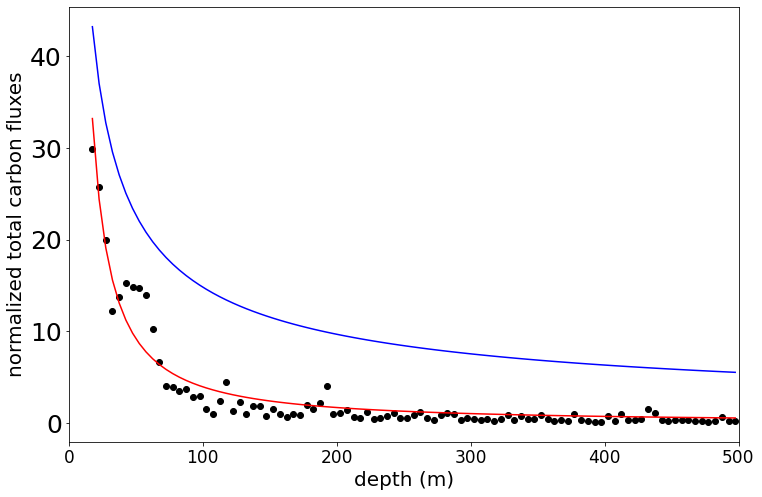

[[ 0.02266429 -0.00418822]
 [-0.00418822  0.00096085]]
sigma: [0.09630881] [0.15054664 0.03099754]
[[ 0.02850616 -0.00814272]
 [-0.00814272  0.00298302]]
sigma: [0.14721379] [0.16883767 0.05461701]
[[ 0.02130791 -0.00352351]
 [-0.00352351  0.00086801]]
sigma: [0.10800264] [0.14597228 0.02946201]


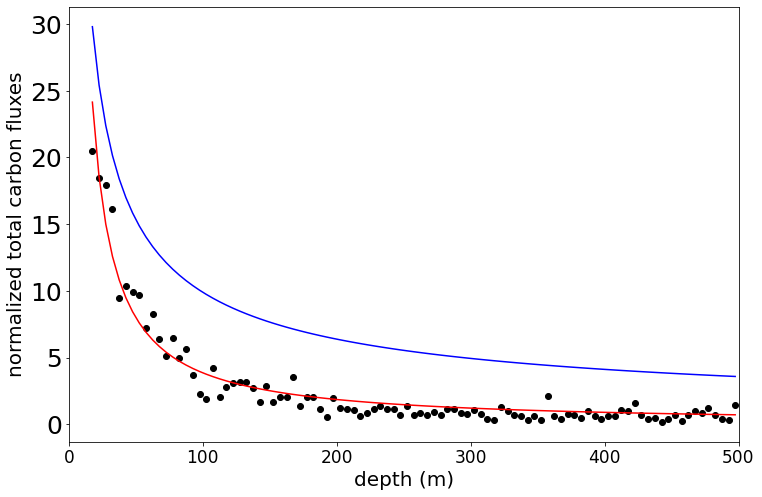

[[ 0.02514508 -0.00555784]
 [-0.00555784  0.00161024]]
sigma: [0.121673] [0.15857201 0.04012782]
[[ 0.02569523 -0.00709268]
 [-0.00709268  0.00232274]]
sigma: [0.1164112] [0.16029732 0.04819478]
[[ 0.02839899 -0.00835179]
 [-0.00835179  0.00317495]]
sigma: [0.12253459] [0.16852    0.05634672]


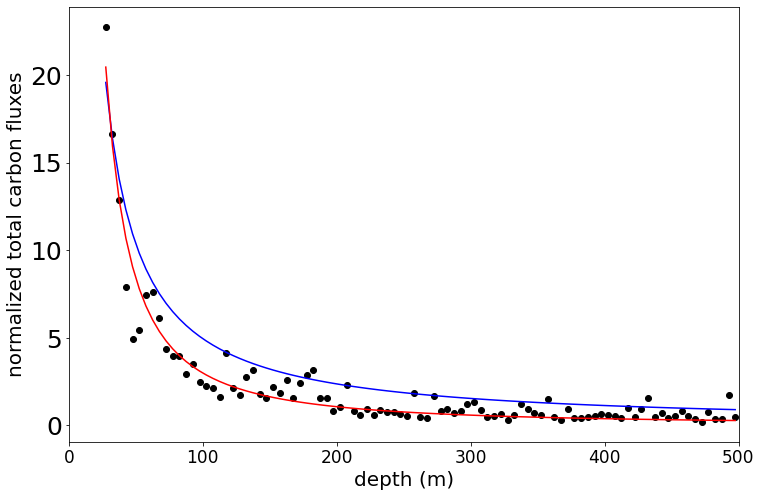

[[ 0.02893523 -0.00976827]
 [-0.00976827  0.00381408]]
sigma: [0.12913443] [0.17010358 0.0617582 ]
[[ 0.0286556  -0.00985983]
 [-0.00985983  0.00387061]]
sigma: [0.14340246] [0.16927965 0.06221425]
[[ 0.024834   -0.00082279]
 [-0.00082279  0.0086209 ]]
sigma: [0.25469049] [0.15758808 0.09284882]


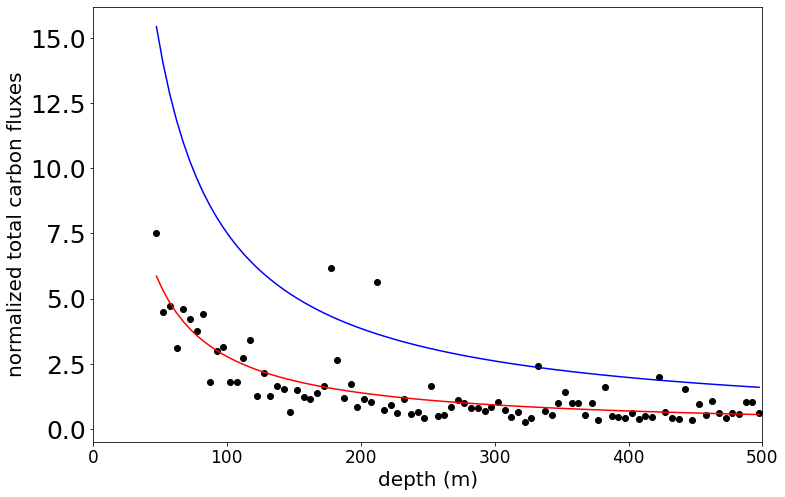

[[0.02802517 0.001711  ]
 [0.001711   0.01305747]]
sigma: [0.29276447] [0.1674072  0.11426927]
[[ 0.02264478 -0.00615747]
 [-0.00615747  0.00200778]]
sigma: [0.08807598] [0.15048182 0.04480828]
[[ 0.02913146 -0.00967331]
 [-0.00967331  0.00383144]]
sigma: [0.14167991] [0.17067941 0.0618986 ]


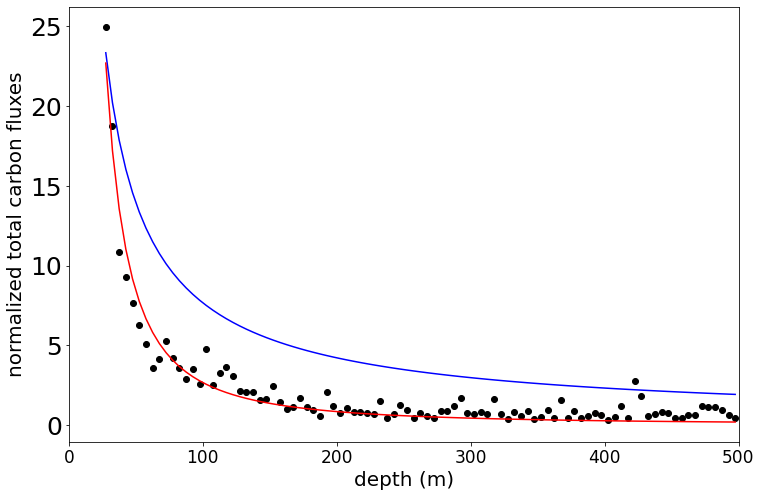

[[ 0.02477757 -0.00609797]
 [-0.00609797  0.00801234]]
sigma: [0.22562185] [0.15740892 0.08951165]
[[ 0.02859307 -0.01043104]
 [-0.01043104  0.00484809]]
sigma: [0.14772606] [0.16909486 0.06962819]
[[ 0.02910312 -0.00825446]
 [-0.00825446  0.00275488]]
sigma: [0.14489859] [0.17059637 0.05248696]


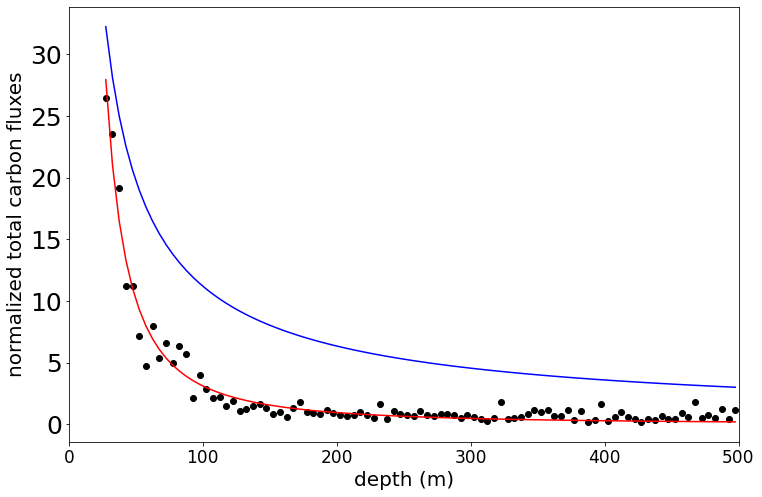

[[ 0.02524137 -0.00575827]
 [-0.00575827  0.00608082]]
sigma: [0.2281501] [0.15887533 0.07797961]
[[ 0.01892854 -0.00138556]
 [-0.00138556  0.00047724]]
sigma: [0.15121516] [0.13758104 0.02184593]
[[0.05629706 0.00411297]
 [0.00411297 0.00189899]]
sigma: [0.59533081] [0.23727001 0.04357746]


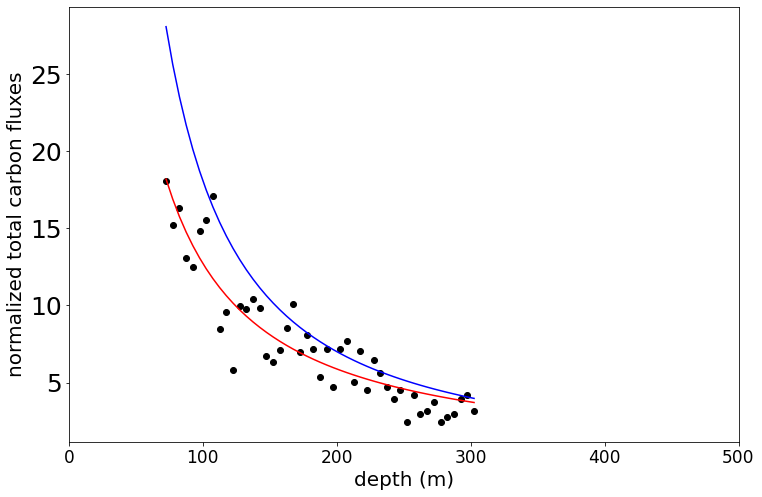

[[0.06832115 0.00658003]
 [0.00658003 0.00140579]]
sigma: [0.44300076] [0.26138315 0.03749387]
[[0.03370496 0.00212688]
 [0.00212688 0.00102161]]
sigma: [0.31472698] [0.18358911 0.03196268]
[[0.05722231 0.0057149 ]
 [0.0057149  0.00156463]]
sigma: [0.47736614] [0.23921185 0.03955545]


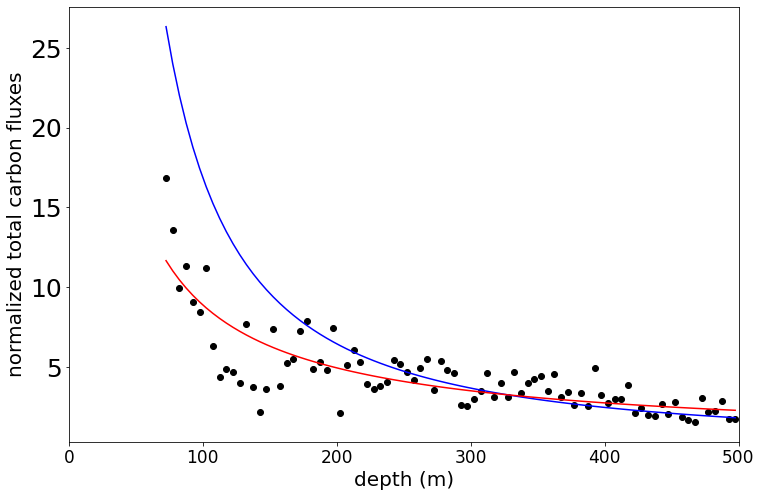

[[0.02927004 0.00169639]
 [0.00169639 0.00095481]]
sigma: [0.27364173] [0.17108491 0.03090008]
[[ 0.01519274 -0.00063252]
 [-0.00063252  0.0002545 ]]
sigma: [0.11795823] [0.12325882 0.01595307]
[[ 0.01674735 -0.00129209]
 [-0.00129209  0.00035246]]
sigma: [0.11414366] [0.12941157 0.0187738 ]


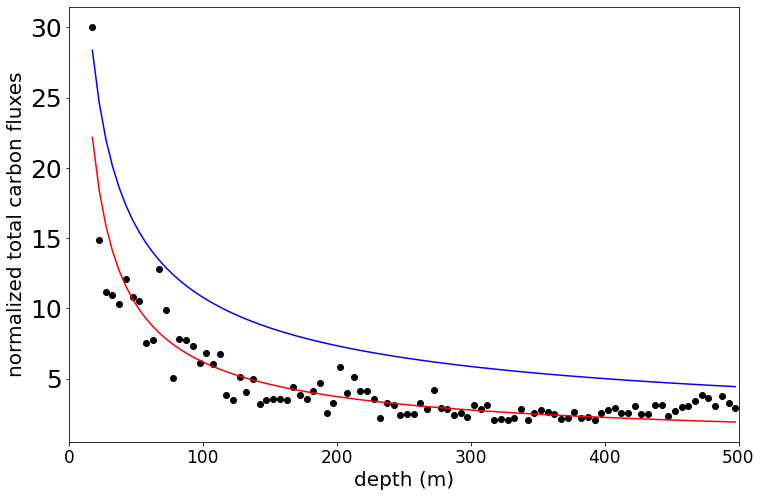

[[ 1.33510344e-02 -6.28500247e-04]
 [-6.28500247e-04  8.37572114e-05]]
sigma: [0.05263037] [0.11554668 0.0091519 ]
[[0.04899124 0.00653833]
 [0.00653833 0.00159325]]
sigma: [0.30269833] [0.22133964 0.03991552]
[[ 0.0151144  -0.00058314]
 [-0.00058314  0.00024069]]
sigma: [0.11791697] [0.12294063 0.01551425]


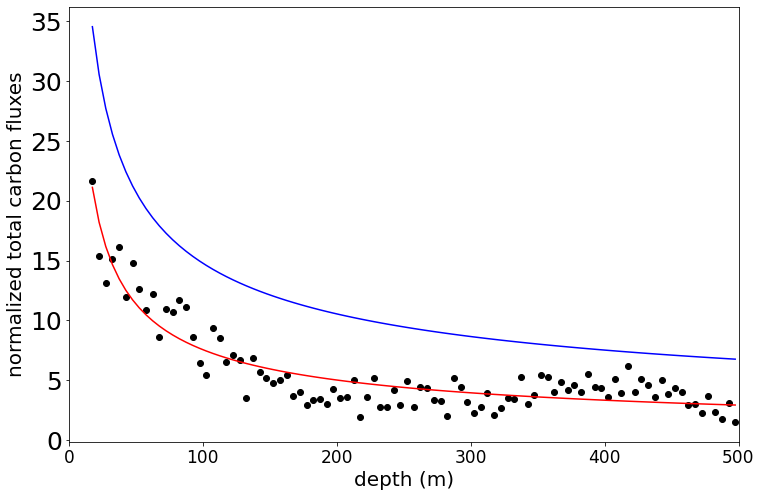

[[0.01344356 0.00010947]
 [0.00010947 0.00023066]]
sigma: [0.10743792] [0.11594636 0.01518754]
[[ 0.01475373 -0.00083193]
 [-0.00083193  0.000247  ]]
sigma: [0.09850417] [0.12146494 0.01571614]
[[ 1.55474347e-02 -3.59512102e-05]
 [-3.59512102e-05  4.04289187e-04]]
sigma: [0.13448937] [0.12468935 0.02010694]


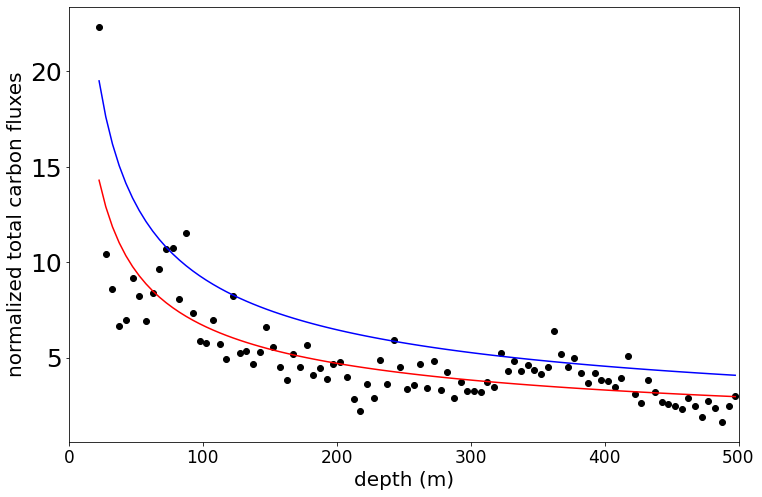

[[ 0.01588119 -0.00087206]
 [-0.00087206  0.00025583]]
sigma: [0.11235641] [0.1260206  0.01599456]
[[ 0.01541574 -0.00074157]
 [-0.00074157  0.0002715 ]]
sigma: [0.11499006] [0.12416013 0.01647734]
[[ 0.00407535 -0.00286866]
 [-0.00286866  0.00205778]]
sigma: [0.06114505] [0.06383843 0.04536273]


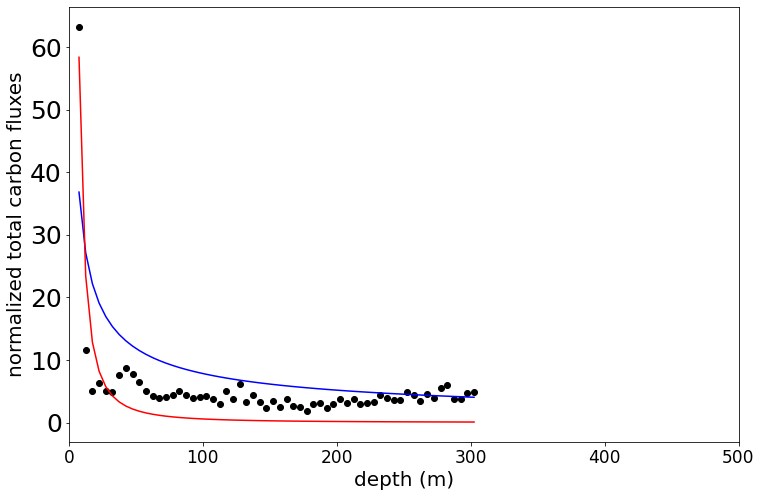

[[0.07085541 0.00679348]
 [0.00679348 0.00096552]]
sigma: [0.14109495] [0.26618679 0.03107279]
[[0.01946664 0.00192966]
 [0.00192966 0.0005756 ]]
sigma: [0.0825632] [0.13952289 0.02399161]
[[0.04906597 0.00413717]
 [0.00413717 0.0006648 ]]
sigma: [0.26527795] [0.2215084  0.02578376]


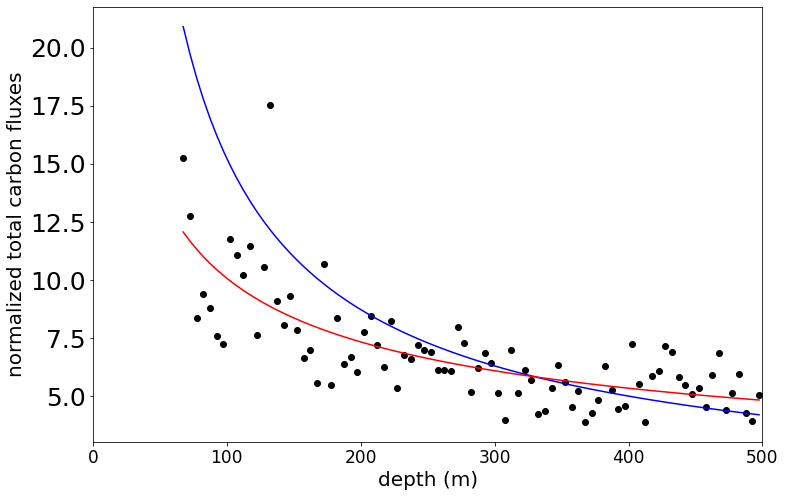

[[0.02755307 0.0016372 ]
 [0.0016372  0.00042413]]
sigma: [0.23364812] [0.16599117 0.02059449]
[[ 0.01226205 -0.0013984 ]
 [-0.0013984   0.00124861]]
sigma: [0.06636464] [0.11073414 0.03533565]
[[ 0.01214849 -0.00127431]
 [-0.00127431  0.00126816]]
sigma: [0.07153345] [0.11022019 0.03561123]


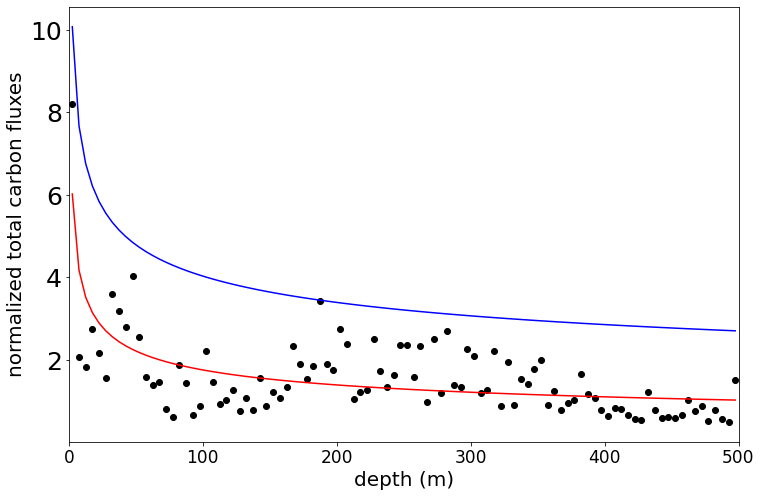

In [57]:

# initialize arrays for 2 type of fit
remineralization_coeff_1 = [] # for the Martin Curve fit with 1 unknown (remineralization)
remineralization_coeff_2, reference_depth_2 =  [], [] # for the Martin Curve fit with 2 unknown (remineralization, reference flux at x) 

for i in range(len(data.profile_name)):
    # initialization
    depth, flx= data.depth[i], data.total_flux[i]

    # estimate indices and depth of the relative maximum in total carbon flux
    # criteria: >0.5*max and in the neighborood of global maximum
    idM = np.argmin(abs(depth-limit_depth_maximum))
    fmax, indmax, ngbr_depth, thr_flx = np.max(flx[:idM]), np.argmax(flx[:idM]), 20, 0.75 #(m)
    if choice_of_maximum==0:
        index=indmax
    else:
        ind = list(set(np.where(flx>thr_flx*fmax)[0]) & set(np.where(abs(depth-depth[indmax])<ngbr_depth)[0]))
        index = int(np.mean(ind))
        
    depth, flx = depth[index:], flx[index:]
    
    # fit data with a Martin Curve
    # fit curve with fixed reference flux
    flx_ref = flx[np.argmin(abs(depth-reference_depth))]
    if flag_bound:
        popt1, pcov1 = curve_fit(MartinCurve, depth, flx/flx_ref, bounds=(0., 1.))
    else:
        popt1, pcov1 = curve_fit(MartinCurve, depth, flx/flx_ref, absolute_sigma=True)
    # store remineralization
    remineralization_coeff_1.append(popt1[0])
    
    # fit curve with 2 unknown
    if flag_bound:
        popt2, pcov2 = curve_fit(MartinCurve_2_unknown, depth, flx, bounds=(0., [10., 1.]))
    else:
        popt2, pcov2 = curve_fit(MartinCurve_2_unknown, depth, flx, absolute_sigma=True)
    # store remineralization     
    remineralization_coeff_2.append(popt2[-1])
    
    '''
    reference_flux = popt2[0]
    reference_depth_2= depth[np.argmin(flx[:idM]-reference_flux)]
    reference_depth_averaged_2 = np.nanmean(depth[np.where(abs(flx[:idM]-reference_flux)<0.1)[0]])
    print ('profile: ', data.profile_name[i])
    print ('reference flux: ', reference_flux, 'mg.m-2.d-1')
    print ('reference depth: ', reference_depth_2, 'm')
    print ('reference depth averaged: ', reference_depth_averaged_2, 'm')
    '''
    
    
    if i%3==0:
        flx_fit =  flx_ref*MartinCurve(depth,*popt1)
        flx_fit2 = MartinCurve_2_unknown(depth,*popt2)

        # plot fit
        fig,ax = plt.subplots(1, figsize=fgsz)
        ax.plot(depth,flx,'ok')
        ax.plot(depth, flx_fit,'b', label='fit with Martin Curve (Power law)')
        ax.plot(depth, flx_fit2,'r', label='fit with Martin Curve (2 unknowns)')
        ax.set_xlabel('depth (m)',fontsize=20), ax.set_ylabel('normalized total carbon fluxes', fontsize=20)
        ax.set_xlim(dl)
        
        plt.show()
   

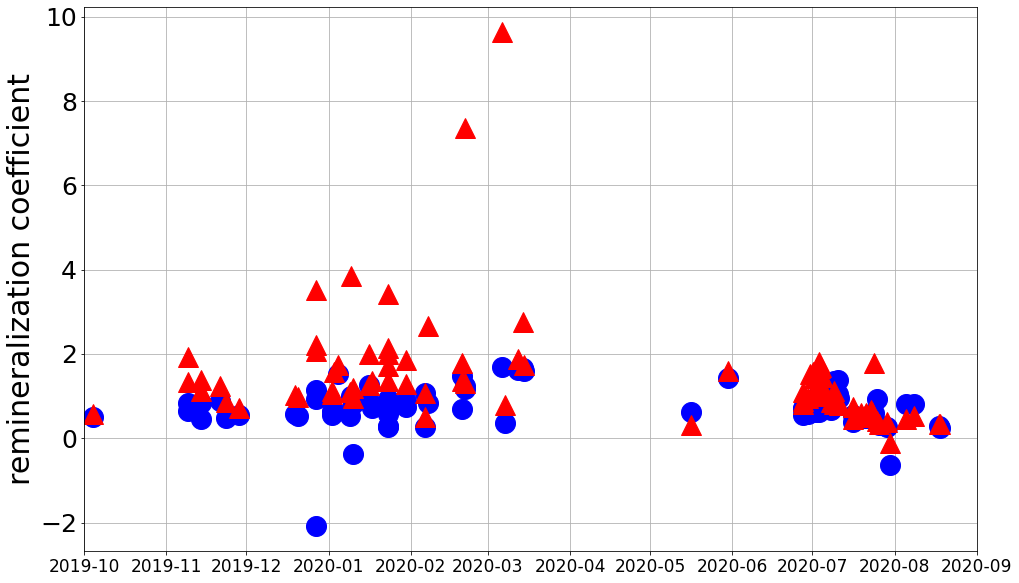

In [48]:
#
# plot attenuation coefficient
# 

cl=[0,1]

# time limits
date0, date1 = datetime.fromordinal(int(np.floor(data.dates[0]))), datetime.fromordinal(int(np.floor(data.dates[-1])))
monthi, yeari, monthf, yearf = date0.month, date0.year, date1.month, date1.year
monthf = monthf + 1
if monthf>12:
    monthf, yearf = 1, yearf + 1 
datei, datef = datetime.strptime(str(yeari) + str(monthi) + '01', '%Y%m%d'), datetime.strptime(str(yearf) + str(monthf) + '01', '%Y%m%d')
tl=[datei, datef]

# plot
fig,ax = plt.subplots(1, figsize=(16,10))
ax.plot_date(np.asarray(data.dates)-date_ref_plot, remineralization_coeff_1 ,'ob', markersize=20)
ax.plot_date(np.asarray(data.dates)-date_ref_plot, remineralization_coeff_2 ,'^r', markersize=20)
ax.set_ylabel('remineralization coefficient', fontsize=30), ax.grid(), ax.set_xlim(tl)
if flag_bound:
    ax.set_ylim(cl)